### **1st Assigment**

In [1]:
import numpy as np

def unitStep(v):
    return 1 if v >= 0 else 0

def perceptronModel(x, w, b):
    v = np.dot(w, x) + b
    return unitStep(v)

def train_perceptron(X, y, w, b, learning_rate=0.1, epochs=10):
    weights = np.copy(w)
    bias = b
    for epoch in range(epochs):
        for i in range(len(X)):
            y_pred = perceptronModel(X[i], weights, bias)
            error = y[i] - y_pred
            if error != 0:
                weights += learning_rate * error * X[i]
                bias += learning_rate * error
    return weights, bias

def NOT_logicFunction(x, wNOT, bNOT):
    return perceptronModel(x, wNOT, bNOT)

def AND_logicFunction(x, wAND, bAND):
    return perceptronModel(x, wAND, bAND)

def OR_logicFunction(x, wOR, bOR):
    return perceptronModel(x, wOR, bOR)

def XOR_logicFunction(x):
    X_NOT = np.array([[0], [1]])
    y_NOT = np.array([1, 0])
    wNOT = np.array([-1])
    bNOT = 0.5
    wNOT, bNOT = train_perceptron(X_NOT, y_NOT, wNOT, bNOT)

    X_AND = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    y_AND = np.array([0, 0, 0, 1])
    wAND = np.array([1, 1])
    bAND = -1.5
    wAND, bAND = train_perceptron(X_AND, y_AND, wAND, bAND)

    X_OR = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    y_OR = np.array([0, 1, 1, 1])
    wOR = np.array([1, 1])
    bOR = -0.5
    wOR, bOR = train_perceptron(X_OR, y_OR, wOR, bOR)

    y1 = AND_logicFunction(x, wAND, bAND)
    y2 = OR_logicFunction(x, wOR, bOR)
    y3 = NOT_logicFunction(np.array([y1]), wNOT, bNOT)
    final_output = AND_logicFunction(np.array([y2, y3]), wAND, bAND)
    return final_output

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

for i in range(len(X)):
    print(f"XOR({X[i][0]}, {X[i][1]}) = {XOR_logicFunction(X[i])}")


XOR(0, 0) = 0
XOR(0, 1) = 1
XOR(1, 0) = 1
XOR(1, 1) = 0


### **2nd Assigment**

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Text(0, 0.5, 'Loss')

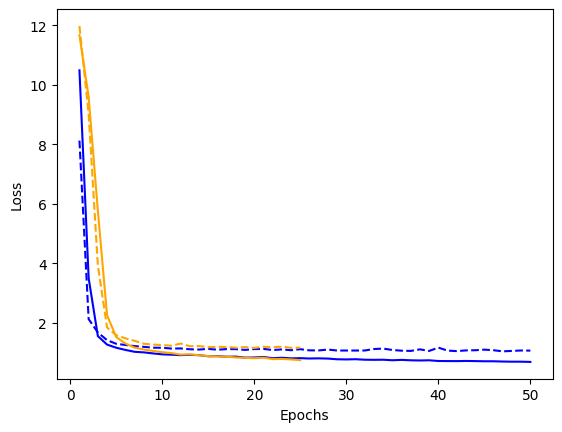

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, callbacks
import numpy as np
import matplotlib.pyplot as plt

def create_data():
    X = np.random.randn(1000, 10)
    y = 2 * X[:, 0] + 3 * X[:, 1] + np.random.randn(1000)
    return X, y

def create_model():
    model = models.Sequential([
        layers.Dense(32, activation="relu", input_shape=(10,)),
        layers.Dense(64, activation="relu"),
        layers.Dense(32, activation="relu"),
        layers.Dense(1)
    ])
    return model

def train_model_with_history(model, optimizer, X, y, batch_size, epochs, validation_split):
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])
    early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=5)
    history = model.fit(X, y, batch_size=batch_size, epochs=epochs, validation_split=validation_split, verbose=0, callbacks=[early_stop])
    return history

X, y = create_data()

model_sgd = create_model()
model_adam = create_model()

optimizer_sgd = optimizers.SGD(learning_rate=0.01)
optimizer_adam = optimizers.Adam(learning_rate=0.001)

epochs = 50
batch_size = 32
validation_split = 0.2

history_sgd = train_model_with_history(model_sgd, optimizer_sgd, X, y, batch_size, epochs, validation_split)
history_adam = train_model_with_history(model_adam, optimizer_adam, X, y, batch_size, epochs, validation_split)

plt.plot(range(1, len(history_sgd.history['loss']) + 1), history_sgd.history['loss'], label='SGD Training Loss', color='blue')
plt.plot(range(1, len(history_sgd.history['val_loss']) + 1), history_sgd.history['val_loss'], label='SGD Validation Loss', color='blue', linestyle='dashed')
plt.plot(range(1, len(history_adam.history['loss']) + 1), history_adam.history['loss'], label='Adam Training Loss', color='orange')
plt.plot(range(1, len(history_adam.history['val_loss']) + 1), history_adam.history['val_loss'], label='Adam Validation Loss', color='orange', linestyle='dashed')
plt.xlabel('Epochs')
plt.ylabel('Loss')


### **2B assignment**

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 72s 37ms/step - accuracy: 0.3782 - loss: 1.7355 - val_accuracy: 0.9077 - val_loss: 0.3186
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 70s 37ms/step - accuracy: 0.7293 - loss: 0.8357 - val_accuracy: 0.9122 - val_loss: 0.2766
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 37ms/step - accuracy: 0.7909 - loss: 0.6584 - val_accuracy: 0.9276 - val_loss: 0.2238
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 38ms/step - accuracy: 0.8232 - loss: 0.5699 - val_accuracy: 0.9320 - val_loss: 0.2166
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 37ms/step - accuracy: 0.8393 - loss: 0.5212 - val_accuracy: 0.9353 - val_loss: 0.2200
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 37ms/step - accuracy: 0.8498 - loss: 0.4914 - val_accuracy: 0.9374 - val_loss: 0.2078
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 36ms/step - accuracy: 0.8624 - loss: 0.4563 - val_accuracy: 0.9383 - val_loss: 0.2304
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 38ms/step - accuracy: 0.8645 -

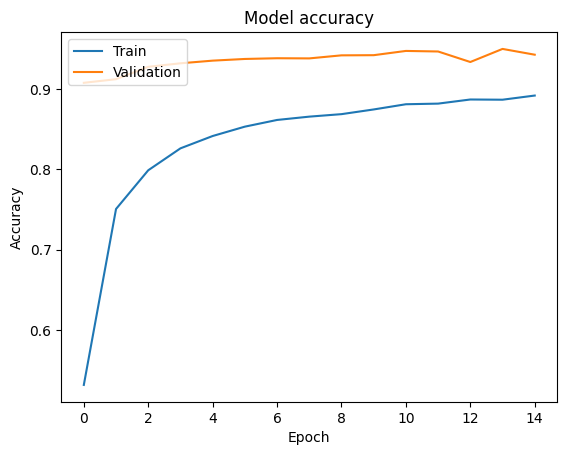

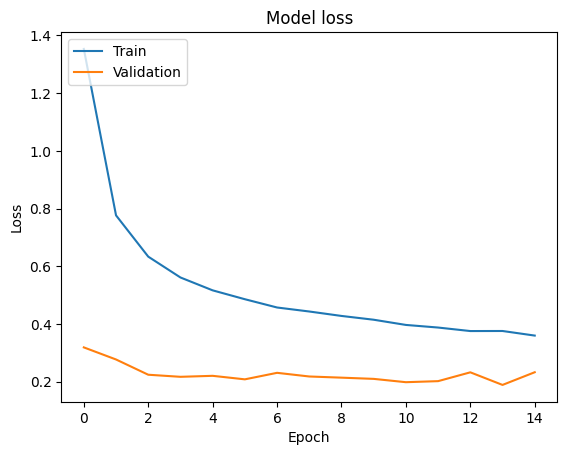

In [3]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((train_images.shape[0], 28, 28, 1)).astype('float32') / 255.0
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1)).astype('float32') / 255.0

data_augmentation = tf.keras.Sequential([
    layers.RandomRotation(0.2),
    layers.RandomTranslation(0.2, 0.2),
    layers.RandomZoom(0.2)
])

model = models.Sequential([
    data_augmentation,
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=15, validation_data=(test_images, test_labels))

test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
